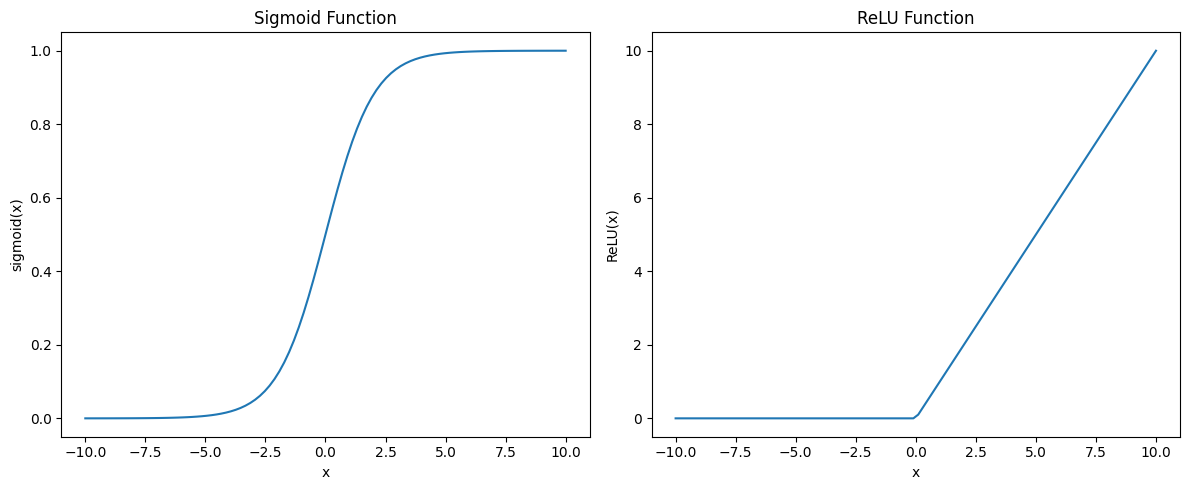

Epoch 0, Loss: 1.3939420014608328
Epoch 100, Loss: 0.6872821541923273
Epoch 200, Loss: 0.681980296037984
Epoch 300, Loss: 0.6760267787170138
Epoch 400, Loss: 0.6688411606069185
Epoch 500, Loss: 0.6597255787772851
Epoch 600, Loss: 0.6478915351537173
Epoch 700, Loss: 0.632523234465272
Epoch 800, Loss: 0.6128532822108933
Epoch 900, Loss: 0.5882677712128043
Epoch 1000, Loss: 0.5584342267714913
Epoch 1100, Loss: 0.5234263120672885
Epoch 1200, Loss: 0.4838242037464475
Epoch 1300, Loss: 0.4407797889316705
Epoch 1400, Loss: 0.39599640608419384
Epoch 1500, Loss: 0.35152093153959396
Epoch 1600, Loss: 0.3093324690733318
Epoch 1700, Loss: 0.2709143131299556
Epoch 1800, Loss: 0.2370442015979953
Epoch 1900, Loss: 0.20785610087391515
Epoch 2000, Loss: 0.18305071934697686
Epoch 2100, Loss: 0.16211344718386825
Epoch 2200, Loss: 0.14447033118713326
Epoch 2300, Loss: 0.1295756183883729
Epoch 2400, Loss: 0.11694997134256813
Epoch 2500, Loss: 0.10619015282596941
Epoch 2600, Loss: 0.0969648500647228
Epoch 2

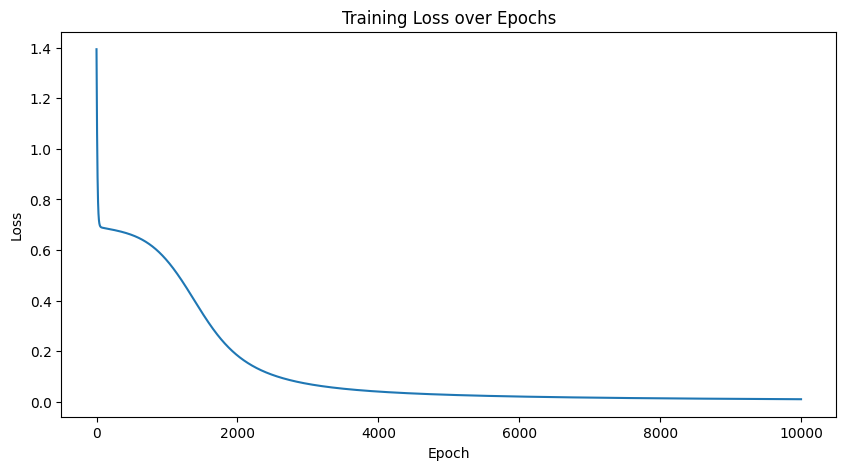

Epoch 0, Loss: 0.8192704959803923
Epoch 100, Loss: 0.7985648262026672
Epoch 200, Loss: 0.7940819893874479
Epoch 300, Loss: 0.7920077432511504
Epoch 400, Loss: 0.7914018001081092
Epoch 500, Loss: 0.7918503025415313
Epoch 600, Loss: 0.7932095717305767
Epoch 700, Loss: 0.7954904973169274
Epoch 800, Loss: 0.7988003862902898
Epoch 900, Loss: 0.8033072424913793
Epoch 1000, Loss: 0.8092155193526126
Epoch 1100, Loss: 0.8167575600195558
Epoch 1200, Loss: 0.8262086003439313
Epoch 1300, Loss: 0.8379247340459264
Epoch 1400, Loss: 0.8523865373903238
Epoch 1500, Loss: 0.8702114536567453
Epoch 1600, Loss: 0.8920942739536513
Epoch 1700, Loss: 0.9186758117711842
Epoch 1800, Loss: 0.9504036442122353
Epoch 1900, Loss: 0.9874608774746458
Epoch 2000, Loss: 1.0297866590468692
Epoch 2100, Loss: 1.077157520785913
Epoch 2200, Loss: 1.1292759690154008
Epoch 2300, Loss: 1.1858196505898542
Epoch 2400, Loss: 1.2464352450570422
Epoch 2500, Loss: 1.3106982201129798
Epoch 2600, Loss: 1.3780771997911687
Epoch 2700, Lo

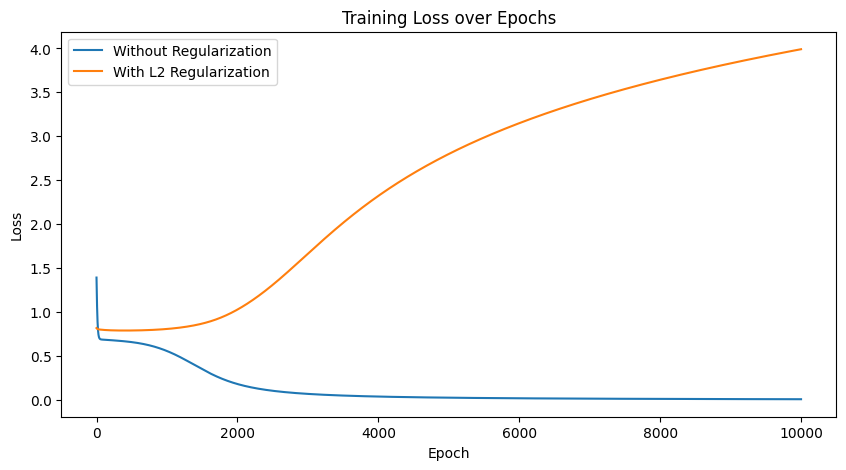

All visualizations have been saved as PNG files.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))
    
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, learning_rate):
        m = X.shape[0]
        
        dZ2 = self.a2 - y
        dW2 = (1/m) * np.dot(self.a1.T, dZ2)
        db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)
        
        dZ1 = np.dot(dZ2, self.W2.T) * (self.a1 * (1 - self.a1))
        dW1 = (1/m) * np.dot(X.T, dZ1)
        db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)
        
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def train(self, X, y, epochs, learning_rate, l2_lambda=0):
        losses = []
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)
            loss = binary_cross_entropy(y, output) + l2_lambda * (np.sum(np.square(self.W1)) + np.sum(np.square(self.W2)))
            losses.append(loss)
            
            # Backward pass
            self.backward(X, y, learning_rate)
            
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")
        
        return losses

def plot_activation_functions():
    x = np.linspace(-10, 10, 100)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, sigmoid(x))
    plt.title('Sigmoid Function')
    plt.xlabel('x')
    plt.ylabel('sigmoid(x)')

    plt.subplot(1, 2, 2)
    plt.plot(x, relu(x))
    plt.title('ReLU Function')
    plt.xlabel('x')
    plt.ylabel('ReLU(x)')

    plt.tight_layout()
    plt.show()
    plt.savefig('activation_functions.png', dpi=300, bbox_inches='tight')
    plt.close()

def plot_training_loss(losses):
    plt.figure(figsize=(10, 5))
    plt.plot(losses)
    plt.title('Training Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()
    plt.savefig('training_loss.png', dpi=300, bbox_inches='tight')
    plt.close()

def plot_regularization_comparison(losses, losses_regularized):
    plt.figure(figsize=(10, 5))
    plt.plot(losses, label='Without Regularization')
    plt.plot(losses_regularized, label='With L2 Regularization')
    plt.title('Training Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    plt.savefig('regularization_comparison.png', dpi=300, bbox_inches='tight')
    plt.close()

if __name__ == "__main__":
    plot_activation_functions()

    # XOR problem
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [1], [1], [0]])

    # Train without regularization
    nn = NeuralNetwork(2, 4, 1)
    losses = nn.train(X, y, epochs=10000, learning_rate=0.1)
    plot_training_loss(losses)

    # Train with L2 regularization
    nn_regularized = NeuralNetwork(2, 4, 1)
    losses_regularized = nn_regularized.train(X, y, epochs=10000, learning_rate=0.1, l2_lambda=0.01)
    
    plot_regularization_comparison(losses, losses_regularized)

    print("All visualizations have been saved as PNG files.")

In [2]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))
    
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2

# Example usage
nn = NeuralNetwork(2, 3, 1)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
output = nn.forward(X)
print("Output:", output)

Output: [[0.53338617]
 [0.68554785]
 [0.50519891]
 [0.64331471]]


In [3]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))
    
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, learning_rate):
        m = X.shape[0]
        
        dZ2 = self.a2 - y
        dW2 = (1/m) * np.dot(self.a1.T, dZ2)
        db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)
        
        dZ1 = np.dot(dZ2, self.W2.T) * (self.a1 * (1 - self.a1))
        dW1 = (1/m) * np.dot(X.T, dZ1)
        db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)
        
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
    def train(self, X, y, epochs, learning_rate):
        losses = []
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)
            loss = binary_cross_entropy(y, output)
            losses.append(loss)
            
            # Backward pass
            self.backward(X, y, learning_rate)
            
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")
        
        return losses

# Train the network on XOR problem
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])
nn = NeuralNetwork(2, 4, 1)
losses = nn.train(X, y, epochs=10000, learning_rate=0.1)

plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('training_loss.png', dpi=300, bbox_inches='tight')
plt.close()
# Test the trained network
print("Final predictions:")
print(nn.forward(X))

Epoch 0, Loss: 0.765197682732876
Epoch 100, Loss: 0.7086398296395015
Epoch 200, Loss: 0.6925698911756044
Epoch 300, Loss: 0.6808374165493247
Epoch 400, Loss: 0.6698093289230196
Epoch 500, Loss: 0.6572150919285841
Epoch 600, Loss: 0.6415054274621649
Epoch 700, Loss: 0.6215429243452852
Epoch 800, Loss: 0.5965333950898917
Epoch 900, Loss: 0.5661140379590794
Epoch 1000, Loss: 0.5305105707023211
Epoch 1100, Loss: 0.490617432388863
Epoch 1200, Loss: 0.4478885542012535
Epoch 1300, Loss: 0.4040819919397747
Epoch 1400, Loss: 0.3609801357348553
Epoch 1500, Loss: 0.32014266198089913
Epoch 1600, Loss: 0.28271273433616306
Epoch 1700, Loss: 0.24932446197371366
Epoch 1800, Loss: 0.22013912299306174
Epoch 1900, Loss: 0.19497143194756716
Epoch 2000, Loss: 0.17343674372624804
Epoch 2100, Loss: 0.15507071695693692
Epoch 2200, Loss: 0.13940664492196828
Epoch 2300, Loss: 0.12601635380921464
Epoch 2400, Loss: 0.11452663596116185
Epoch 2500, Loss: 0.10462174505542893
Epoch 2600, Loss: 0.09603908559052274
Epo

In [4]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))
    
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, learning_rate):
        m = X.shape[0]
        
        dZ2 = self.a2 - y
        dW2 = (1/m) * np.dot(self.a1.T, dZ2)
        db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)
        
        dZ1 = np.dot(dZ2, self.W2.T) * (self.a1 * (1 - self.a1))
        dW1 = (1/m) * np.dot(X.T, dZ1)
        db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)
        
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
    
    def train(self, X, y, epochs, learning_rate, l2_lambda=0.01):
        losses = []
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)
            loss = binary_cross_entropy(y, output) + l2_lambda * (np.sum(np.square(self.W1)) + np.sum(np.square(self.W2)))
            losses.append(loss)
            
            # Backward pass (with L2 regularization)
            m = X.shape[0]
            dZ2 = self.a2 - y
            dW2 = (1/m) * np.dot(self.a1.T, dZ2) + (l2_lambda / m) * self.W2
            db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)
            
            dZ1 = np.dot(dZ2, self.W2.T) * (self.a1 * (1 - self.a1))
            dW1 = (1/m) * np.dot(X.T, dZ1) + (l2_lambda / m) * self.W1
            db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)
            
            self.W2 -= learning_rate * dW2
            self.b2 -= learning_rate * db2
            self.W1 -= learning_rate * dW1
            self.b1 -= learning_rate * db1
            
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")
        
        return losses

# Train with L2 regularization
nn_regularized = NeuralNetwork(2, 4, 1)
losses_regularized = nn_regularized.train(X, y, epochs=10000, learning_rate=0.1, l2_lambda=0.01)
plt.figure(figsize=(10, 5))
plt.plot(losses, label='Without Regularization')
plt.plot(losses_regularized, label='With L2 Regularization')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('regularization_comparison.png', dpi=300, bbox_inches='tight')
plt.close()

Epoch 0, Loss: 0.823705464442868
Epoch 100, Loss: 0.7844763604213576
Epoch 200, Loss: 0.7774506182895472
Epoch 300, Loss: 0.7738267921426653
Epoch 400, Loss: 0.7724167380108302
Epoch 500, Loss: 0.7726458550175069
Epoch 600, Loss: 0.7742518508615382
Epoch 700, Loss: 0.7771379174138364
Epoch 800, Loss: 0.7812963601179715
Epoch 900, Loss: 0.7867684240300883
Epoch 1000, Loss: 0.7936251235589495
Epoch 1100, Loss: 0.8019598530236635
Epoch 1200, Loss: 0.8118837454139567
Epoch 1300, Loss: 0.8235150500705379
Epoch 1400, Loss: 0.8369580644835732
Epoch 1500, Loss: 0.8522752840154373
Epoch 1600, Loss: 0.8694635491756822
Epoch 1700, Loss: 0.8884452941865678
Epoch 1800, Loss: 0.9090792573522206
Epoch 1900, Loss: 0.9311869967348969
Epoch 2000, Loss: 0.9545878491791662
Epoch 2100, Loss: 0.9791360769904505
Epoch 2200, Loss: 1.0047558464753268
Epoch 2300, Loss: 1.031467437950932
Epoch 2400, Loss: 1.0593911946485295
Epoch 2500, Loss: 1.0887129117353447
Epoch 2600, Loss: 1.119607964227725
Epoch 2700, Loss